In [140]:
import pandas as pd
import glob, os
#import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
import time
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from pandas.core.dtypes.common import is_string_dtype
# from sklearn.metrics import confusion_matrix , plot_roc_curve
# PCA
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings('ignore')
# pd.timestamp.now
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [141]:
process_time = []

In [144]:
df_train_Crime_MY3=pd.read_csv(r"data\NewTable08_Map_Crime_MY30713.csv")
df_train_Crime_MY3

In [175]:
df_trainLa=pd.read_csv(r"data\table9_Map_Crime_median_month_N1.csv")
df_trainLa_loaded_drop=df_trainLa.dropna()
df_trainLa_loaded_drop.columns

Index(['Meshblock', 'LATITUDE', 'LONGITUDE', ' Month Year', 'Month', 'Year',
       'Area Unit', 'Location Type', 'Number of Records',
       'Occurrence Day Of Week', 'Occurrence Hour Of Day',
       'Territorial Authority', 'ANZSOC Group', 'Locn Type Division',
       'ANZSOC Subdivision', 'Victimisations', 'Types of Crime ID',
       'Types of Crime', 'TA_map', 'median_sex', 'median_age',
       'median_qualification', 'median_households', 'median_income',
       'population_count', 'median_weekly_rent'],
      dtype='object')

In [176]:
df_trainLa2=pd.read_csv(r"data\NewTable10_Map_Crime_SA1_Median_Non6.csv")
df_trainLa2_drop=df_trainLa2.dropna()
df_trainLa2.columns

Index(['Meshblock', 'SA12018', 'LATITUDE', 'LONGITUDE', 'TA_ID',
       'Territorial_Authority', 'Month', 'Year', 'Location_Type',
       'Number_of_Records', 'Day_Of_Week_ID', 'Day_Of_Week', 'Hour_Of_Day',
       'ANZSOC_Group', 'Locn_Type_Division', 'ANZSOC_Subdivision',
       'Victimisations', 'Sum_of_population_count', 'Population_percentage',
       'Crime_Case_in_area', 'Crime_Cases_in_area_percentage',
       'crime_by_area_and_population', 'weekly_rent', 'weekly_rent_percent',
       'sex_Male', 'sex_Male_Percent', 'sex_Female', 'sex_Female_Precent',
       'Median_age', 'Household', 'Employ1_Employed_Full_time',
       'Employ2_Employed_Part_time', 'Employ3_Unemployed',
       'Employ_Employed_Full_time_Percent',
       'Employ_Employed_Part_time_Percent', 'Employ_Unemployed_Percent',
       'Income1_Less5000', 'Income2_5001to10000', 'Income3_10001to20000',
       'Income4_4_20001to30000', 'Income5_30001to50000', 'Income6_5000170000',
       'Income7_70001or_more', 'Age1_Unde

In [147]:
df_trainLa2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267210 entries, 0 to 1267209
Data columns (total 49 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   Meshblock                          1267210 non-null  object 
 1   SA12018                            1096323 non-null  float64
 2   LATITUDE                           1267210 non-null  float64
 3   LONGITUDE                          1267210 non-null  float64
 4   TA_ID                              1254895 non-null  float64
 5   Territorial_Authority              1267210 non-null  object 
 6   Month                              1267210 non-null  int64  
 7   Year                               1267210 non-null  int64  
 8   Location_Type                      1267210 non-null  object 
 9   Number_of_Records                  1267210 non-null  int64  
 10  Day_Of_Week_ID                     1267210 non-null  int64  
 11  Day_Of_Week             

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

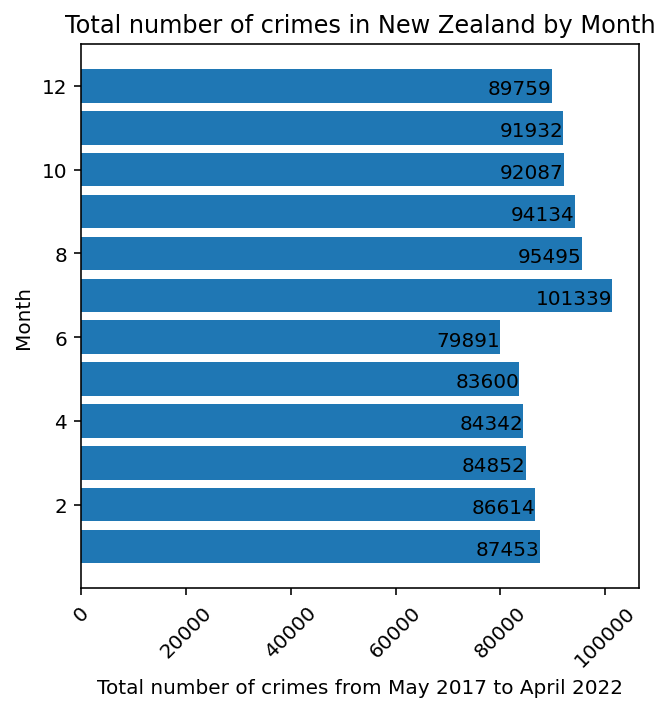

In [148]:
# df_trainingLa, trainLa_data
#Target
fig, ax = plt.subplots(figsize=(5, 5))
plt.barh(df_trainLa["Month"].unique(),df_trainLa["Month"].value_counts())
ax.set_title('Total number of crimes in New Zealand by Month')
ax.set(xlabel='Total number of crimes from May 2017 to April 2022', ylabel='Month')

# ax1=plt.figure(figsize=(5,10))
# ax = sns.barplot(df_trainingLa["Month"].unique(),                
#                  df_trainingLa["Month"].value_counts())
# ax.set_title('Total number of female by Territorial Authority')
# ax.set(xlabel='', ylabel="Month")
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.2,
             str(round((i.get_width()), 2)),
             fontsize = 10, 
             color ='black',ha="right")
plt.xticks(rotation=45)

(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

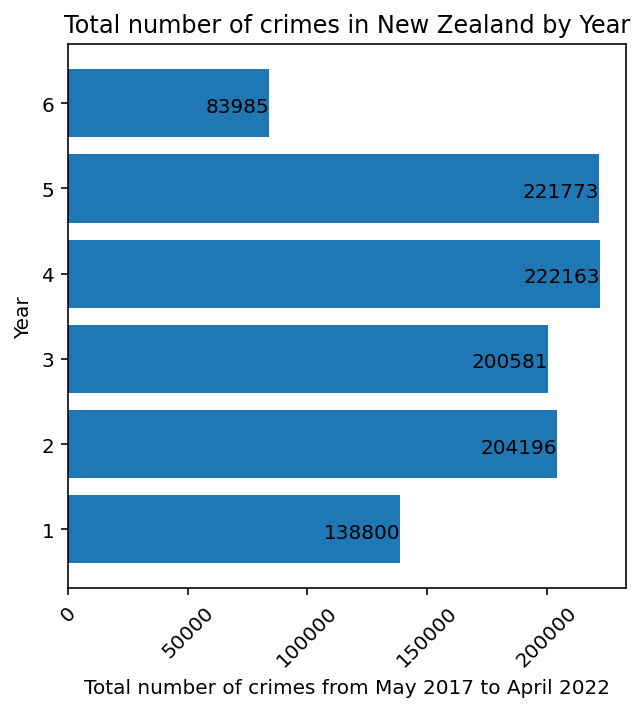

In [149]:
#Target
fig, ax = plt.subplots(figsize=(5, 5))
plt.barh(df_trainLa["Year"].unique(),df_trainLa["Year"].value_counts())
ax.set_title('Total number of crimes in New Zealand by Year')
ax.set(xlabel='Total number of crimes from May 2017 to April 2022', ylabel='Year')
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 10, 
             color ='black',ha="right")
plt.xticks(rotation=45)

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

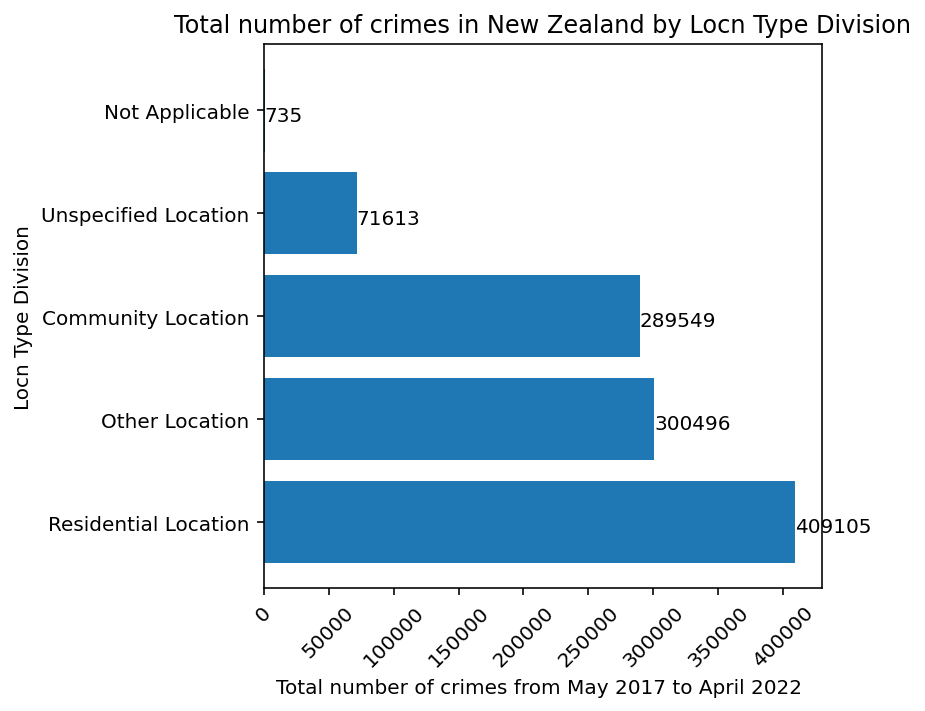

In [150]:
# Locn Type Division
fig, ax = plt.subplots(figsize=(5, 5))
plt.barh(df_trainLa["Locn Type Division"].unique(),df_trainLa["Locn Type Division"].value_counts())
ax.set_title('Total number of crimes in New Zealand by Locn Type Division')
ax.set(xlabel='Total number of crimes from May 2017 to April 2022 ', ylabel='Locn Type Division')
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 10, 
             color ='black')
plt.xticks(rotation=45)

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

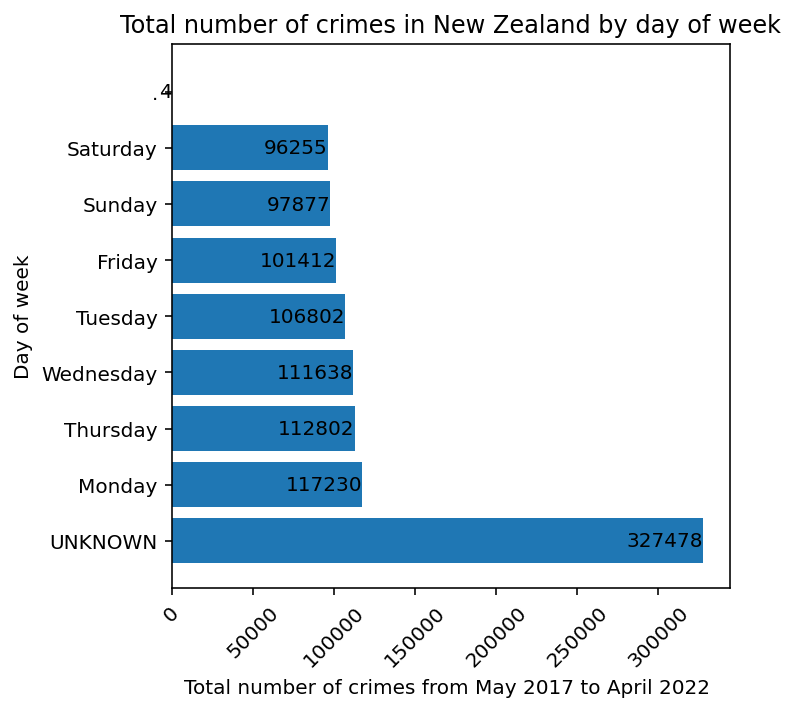

In [151]:
#Target
fig, ax = plt.subplots(figsize=(5, 5))
plt.barh(df_trainLa["Occurrence Day Of Week"].unique(),df_trainLa["Occurrence Day Of Week"].value_counts())
ax.set_title('Total number of crimes in New Zealand by day of week')
ax.set(xlabel='Total number of crimes from May 2017 to April 2022 ', ylabel='Day of week')
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 10, 
             color ='black',ha="right")
plt.xticks(rotation=45)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

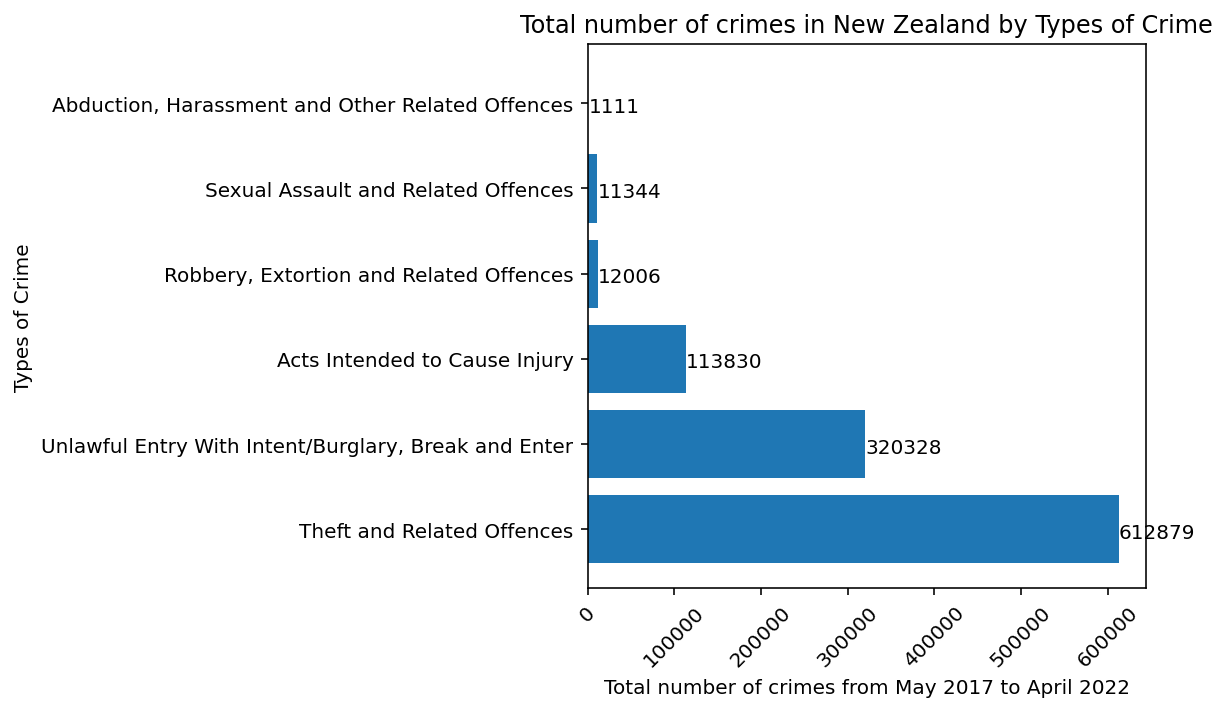

In [152]:
#Target
fig, ax = plt.subplots(figsize=(5, 5))
plt.barh(df_trainLa["Types of Crime"].unique(),df_trainLa["Types of Crime"].value_counts())
ax.set_title('Total number of crimes in New Zealand by Types of Crime')
ax.set(xlabel='Total number of crimes from May 2017 to April 2022', ylabel='Types of Crime')
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 10, 
             color ='black')
plt.xticks(rotation=45)

In [155]:
df_train_Crime_MY3_drop=df_train_Crime_MY3.dropna()
df_train_Crime_MY3_drop.columns

Index(['Meshblock', 'LATITUDE', 'LONGITUDE', 'TA2018', 'Month_Year', 'Month',
       'Year', 'Area_unitID', 'Area_Unit', 'SHAPE_X', 'SHAPE_Y',
       'Location_type_ID', 'Location_Type', 'Number_of_Records',
       'Day_Of_Week_ID', 'Day_Of_Week', 'HRGroup', 'Hour_Of_Day', 'Table1',
       'TA_ID', 'Territorial_Authority', 'Weapon_ID', 'Weapon', 'WKT',
       'ANZSOC_GroupID', 'ANZSOC_Group', 'Locn_Type_DivisionID',
       'Locn_Type_Division', 'ANZSOC_Subdivision_ID', 'ANZSOC_Subdivision',
       'Victimisations', 'Types_of_Crime_ID', 'Types_of_Crime',
       'population_count', 'Population_percentage', 'Crime_Case_in_area',
       'Crime_Cases_in_area_percentage', 'crime_by_area_and_population',
       'weekly_rent', 'weekly_rent_percent', 'sex_Male', 'sex_Male_Percent',
       'sex_Female', 'sex_Female_Precent', 'Median_age', 'Household',
       'Employed_Full_time', 'Employed_Part_time', 'Unemployed',
       '1_5000orless', '2_5001to10000', '3_10001to20000', '4_20001to30000',
     

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

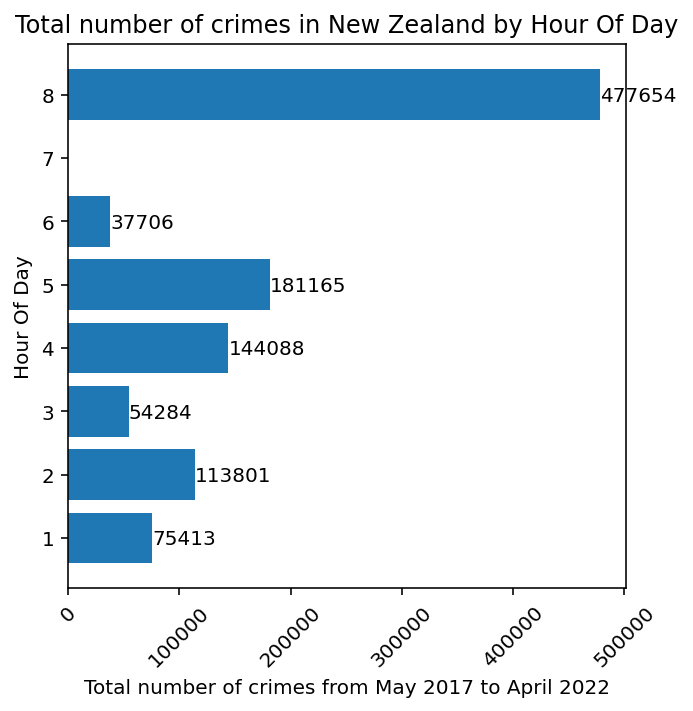

In [156]:
#Target
# df_trainLa_loaded_drop_15 = df_trainLa_loaded_drop[df_trainLa_loaded_drop['Hour_Of_Day'] != 99]
fig, ax = plt.subplots(figsize=(5,5))
# df_trainLa_loaded_drop.ilog[1:]<30
plt.barh(df_trainLa2_drop["Hour_Of_Day"].unique(),df_trainLa2_drop["Hour_Of_Day"].value_counts())
ax.set_title('Total number of crimes in New Zealand by Hour Of Day')
ax.set(xlabel='Total number of crimes from May 2017 to April 2022', ylabel='Hour Of Day')
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 10, 
             color ='black')
plt.xticks(rotation=45)

In [158]:
df_trainEco=pd.read_csv(r"data\economic data.csv")
df_trainEco_loaded_drop=df_trainEco.dropna()
df_trainEco_loaded_drop=df_trainEco_loaded_drop.rename(columns={'Sum of population_count':'population_in_area','Crime Case in area':'Crime_Cases_in_area','crime by area and population':'crime_by_area_and_population','Crime by area and weekly rent':'Crime_by_area_and_weekly_rent','working hours in a week':'working_hours_in_a_week'})
df_trainEco_loaded_drop.columns

Index(['TA2018', 'TA', 'population_in_area', 'Crime_Cases_in_area',
       'crime_by_area_and_population', 'Crime_by_area_and_weekly_rent',
       'sex_Male', 'sex_Female', 'age', 'median_income'],
      dtype='object')

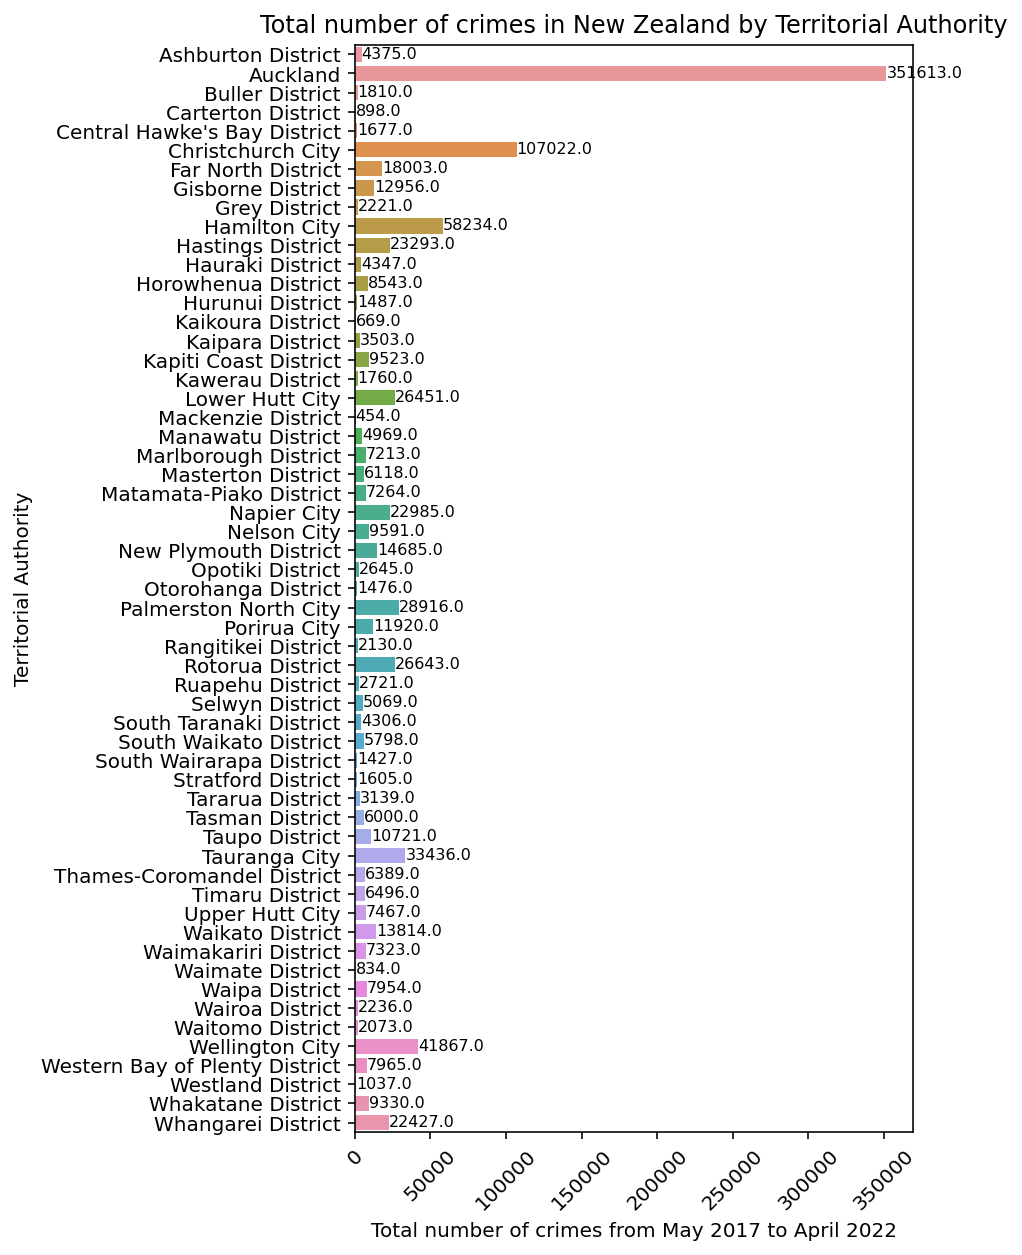

In [159]:
ax=plt.figure(figsize=(5,10))
ax = sns.barplot(df_trainEco_loaded_drop["Crime_Cases_in_area"],                
                 y=df_trainEco_loaded_drop["TA2018"],estimator=sum)

ax.set_title('Total number of crimes in New Zealand by Territorial Authority')
ax.set(xlabel='Total number of crimes from May 2017 to April 2022', ylabel='Territorial Authority')
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.6,
             str(round((i.get_width()), 2)),
             fontsize = 8, 
             color ='black')
    plt.xticks(rotation=45)

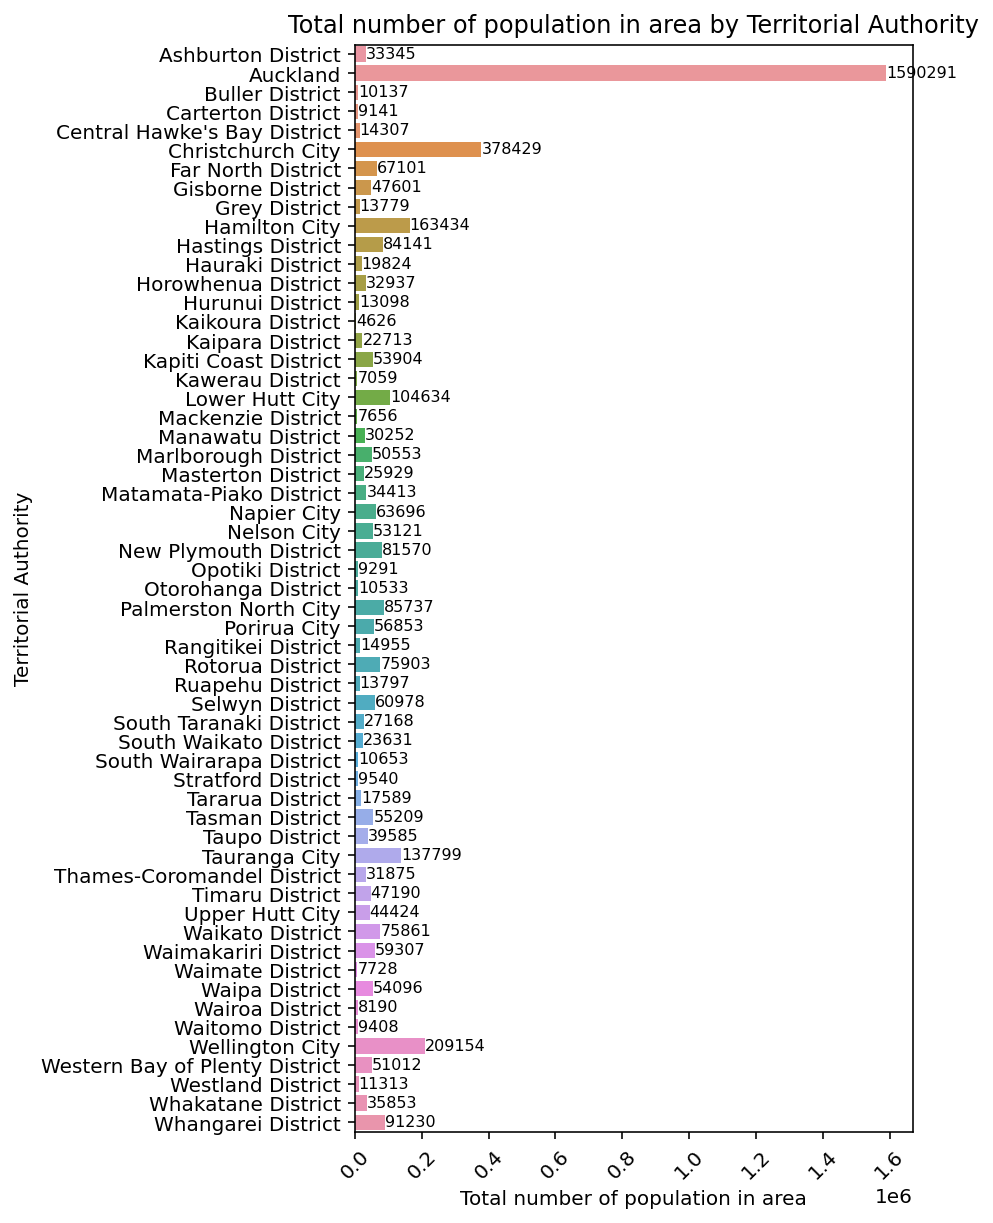

In [160]:
ax=plt.figure(figsize=(5,10))
ax = sns.barplot(df_trainEco_loaded_drop["population_in_area"],                
                 y=df_trainEco_loaded_drop["TA2018"],estimator=sum)
ax.set_title('Total number of population in area by Territorial Authority')
ax.set(xlabel='Total number of population in area', ylabel='Territorial Authority')
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.6,
             str(round((i.get_width()), 2)),
             fontsize = 8, 
             color ='black')
    plt.xticks(rotation=45)

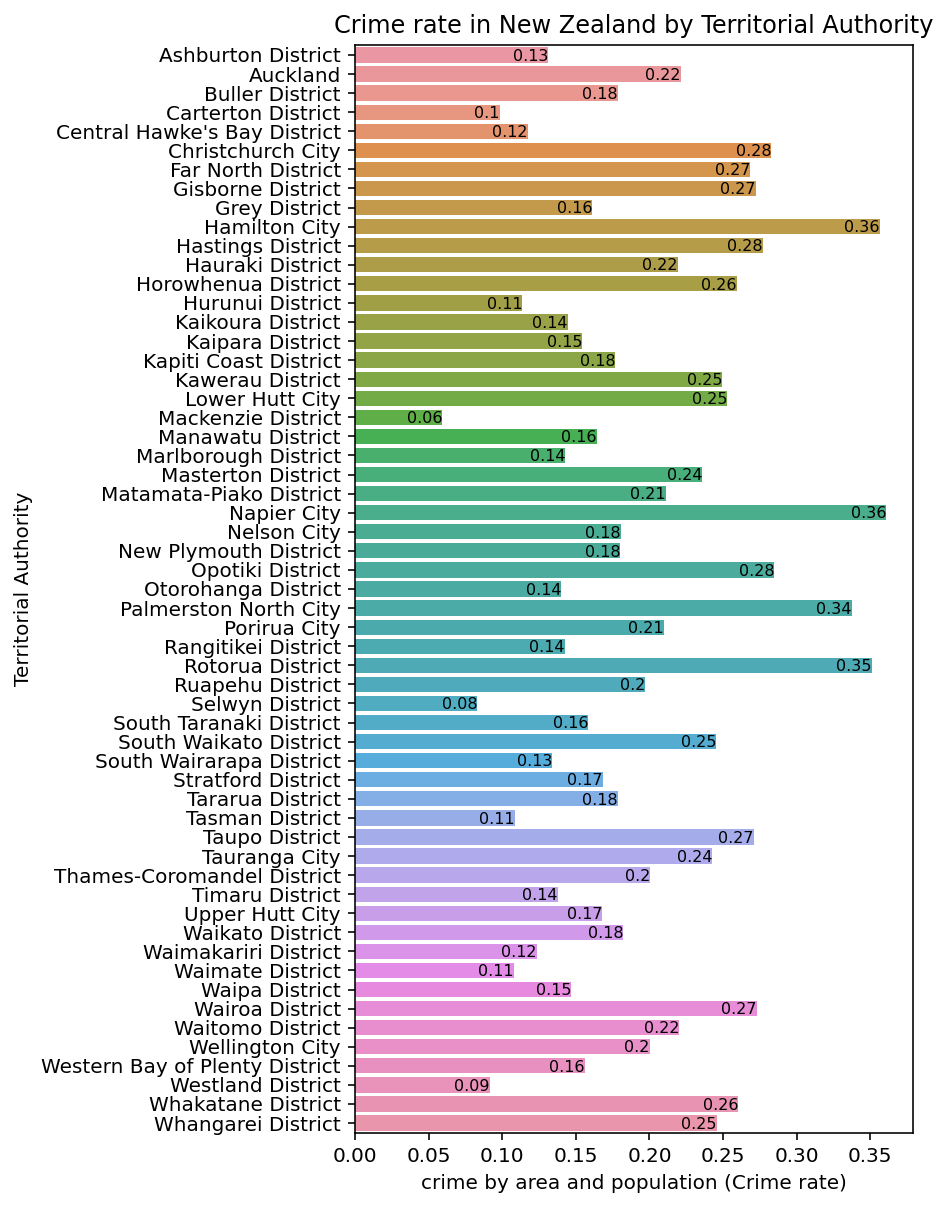

In [161]:
ax=plt.figure(figsize=(5,10))
ax = sns.barplot(df_trainEco_loaded_drop["crime_by_area_and_population"],                
                 y=df_trainEco_loaded_drop["TA2018"],estimator=sum)
ax.set_title('Crime rate in New Zealand by Territorial Authority')
ax.set(xlabel='crime by area and population (Crime rate)', ylabel='Territorial Authority')
for i in ax.patches:
    plt.text(i.get_width()+0.00, i.get_y()+0.7,
             str(round((i.get_width()), 2)),
             fontsize = 8, 
             color ='black',ha="right")

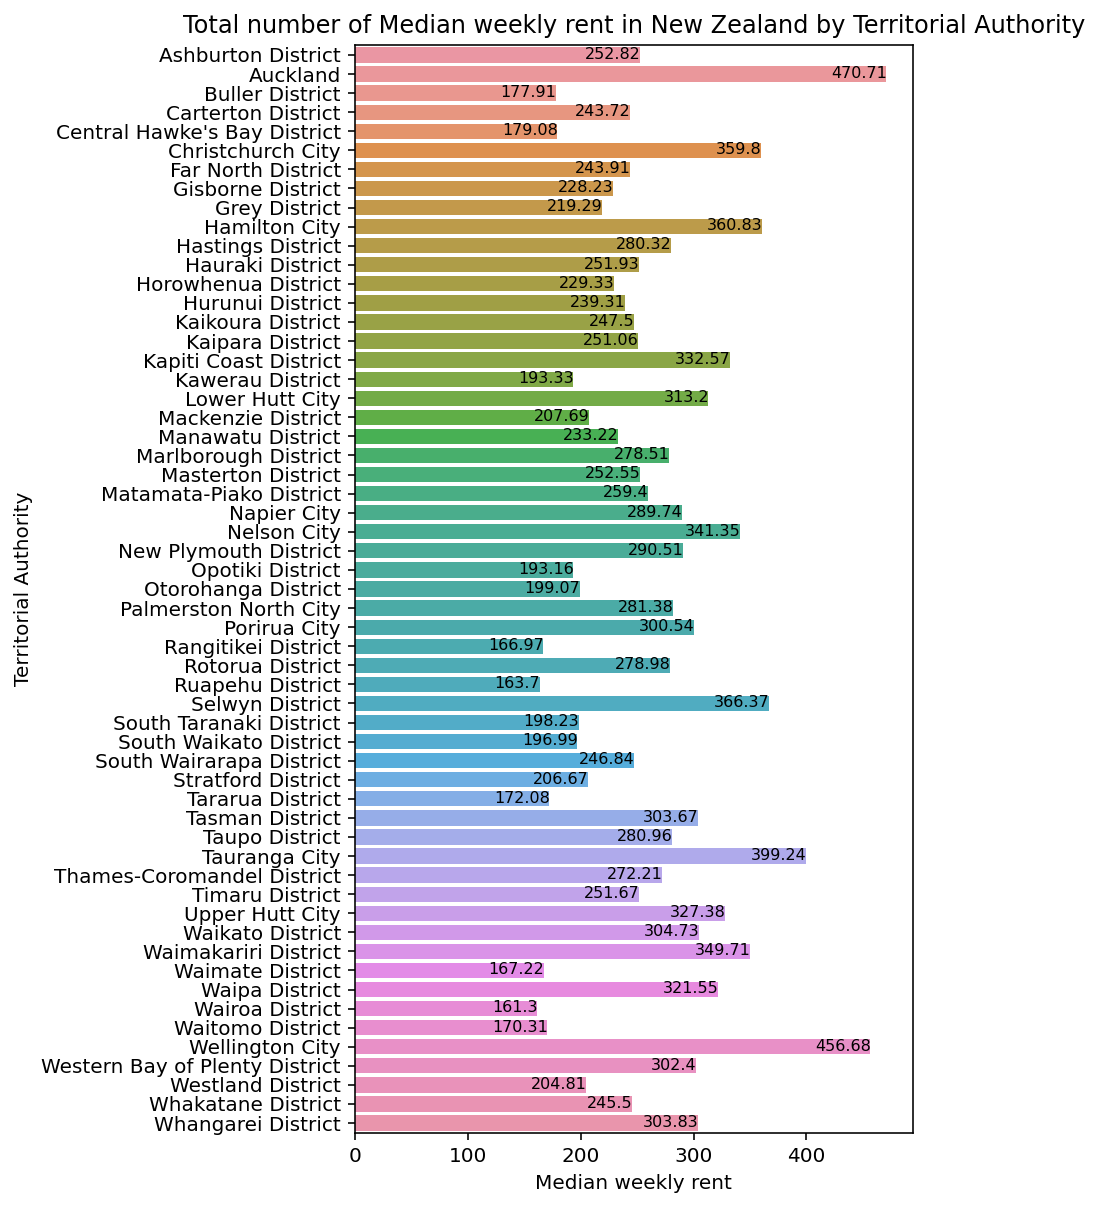

In [162]:
ax=plt.figure(figsize=(5,10))
ax = sns.barplot(df_trainEco_loaded_drop["Crime_by_area_and_weekly_rent"],                
                 y=df_trainEco_loaded_drop["TA2018"],estimator=sum)
ax.set_title('Total number of Median weekly rent in New Zealand by Territorial Authority')
ax.set(xlabel='Median weekly rent', ylabel='Territorial Authority')
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.6,
             str(round((i.get_width()), 2)),
             fontsize = 8, 
             color ='black',ha="right")

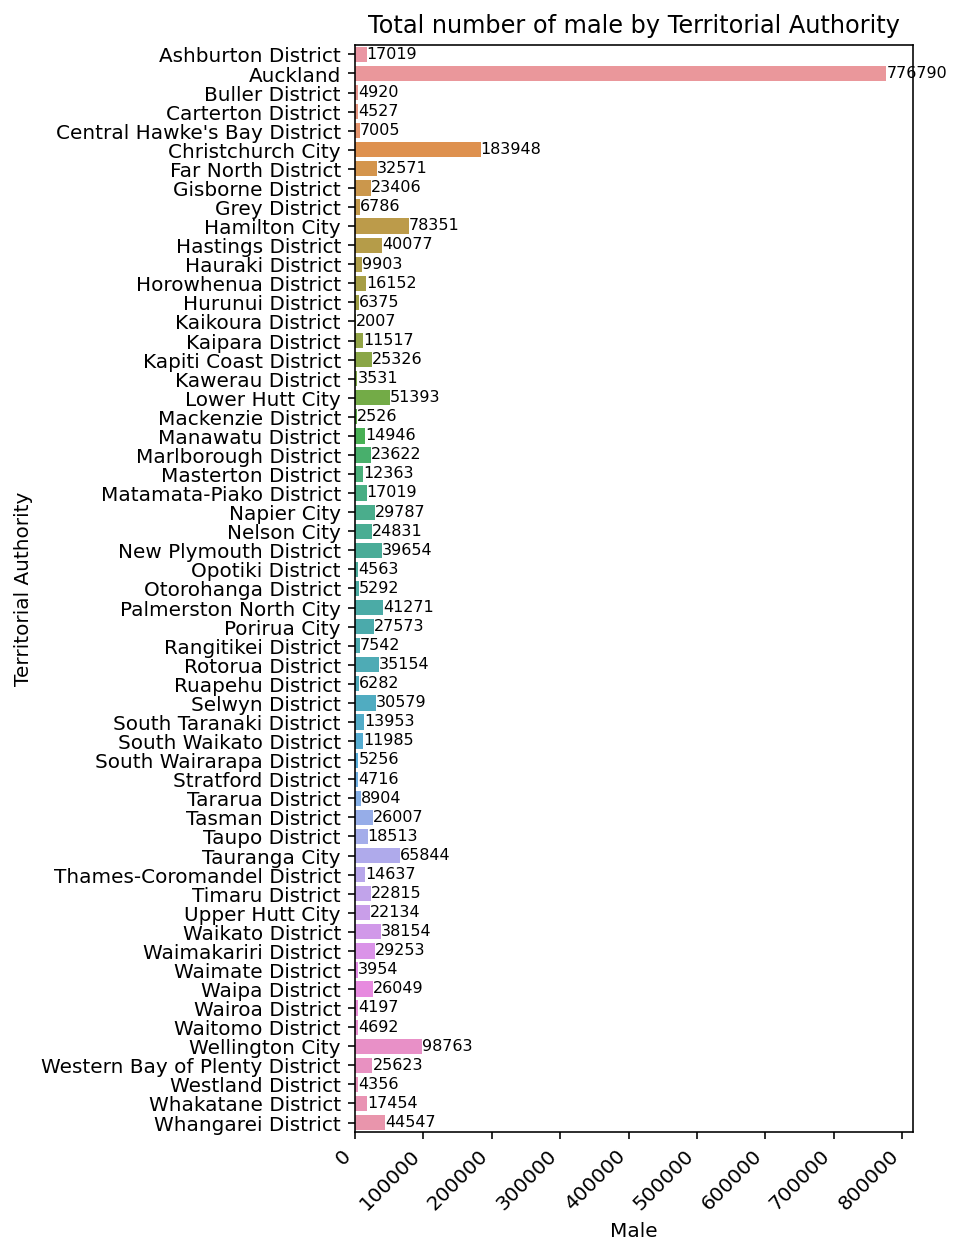

In [163]:
ax=plt.figure(figsize=(5,10))
ax = sns.barplot(df_trainEco_loaded_drop["sex_Male"],                
                 y=df_trainEco_loaded_drop["TA2018"],estimator=sum)
ax.set_title('Total number of male by Territorial Authority')
ax.set(xlabel='Male', ylabel='Territorial Authority')
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.6,
             str(round((i.get_width()), 2)),
             fontsize = 8, 
             color ='black')
    plt.xticks(rotation=45,ha="right")

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000., 900000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

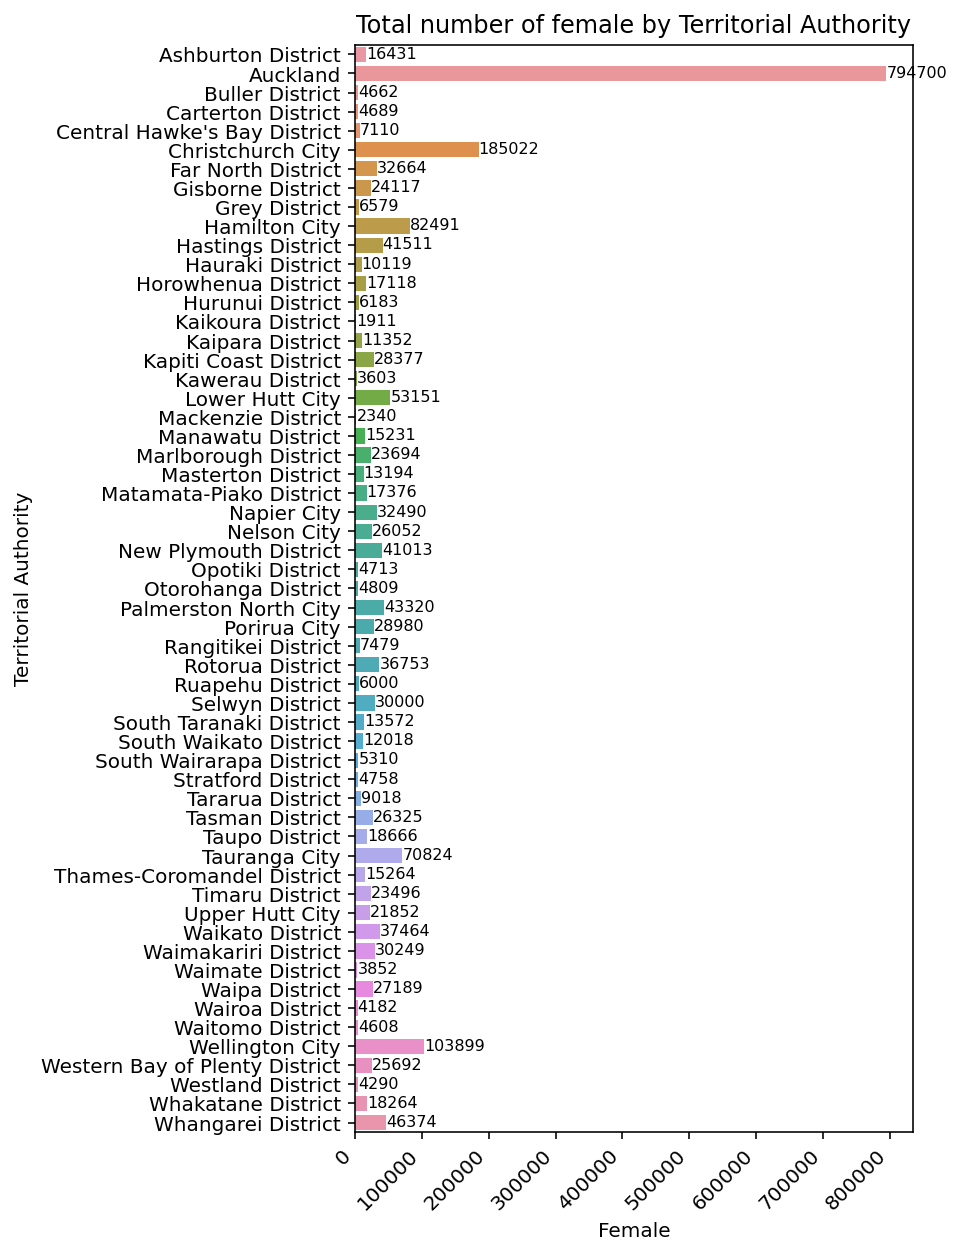

In [164]:
ax1=plt.figure(figsize=(5,10))
ax = sns.barplot(df_trainEco_loaded_drop["sex_Female"],                
                 y=df_trainEco_loaded_drop["TA2018"],estimator=sum)
ax.set_title('Total number of female by Territorial Authority')
ax.set(xlabel='Female', ylabel='Territorial Authority')
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.6,
             str(round((i.get_width()), 2)),
             fontsize = 8, 
             color ='black')
plt.xticks(rotation=45,ha="right")

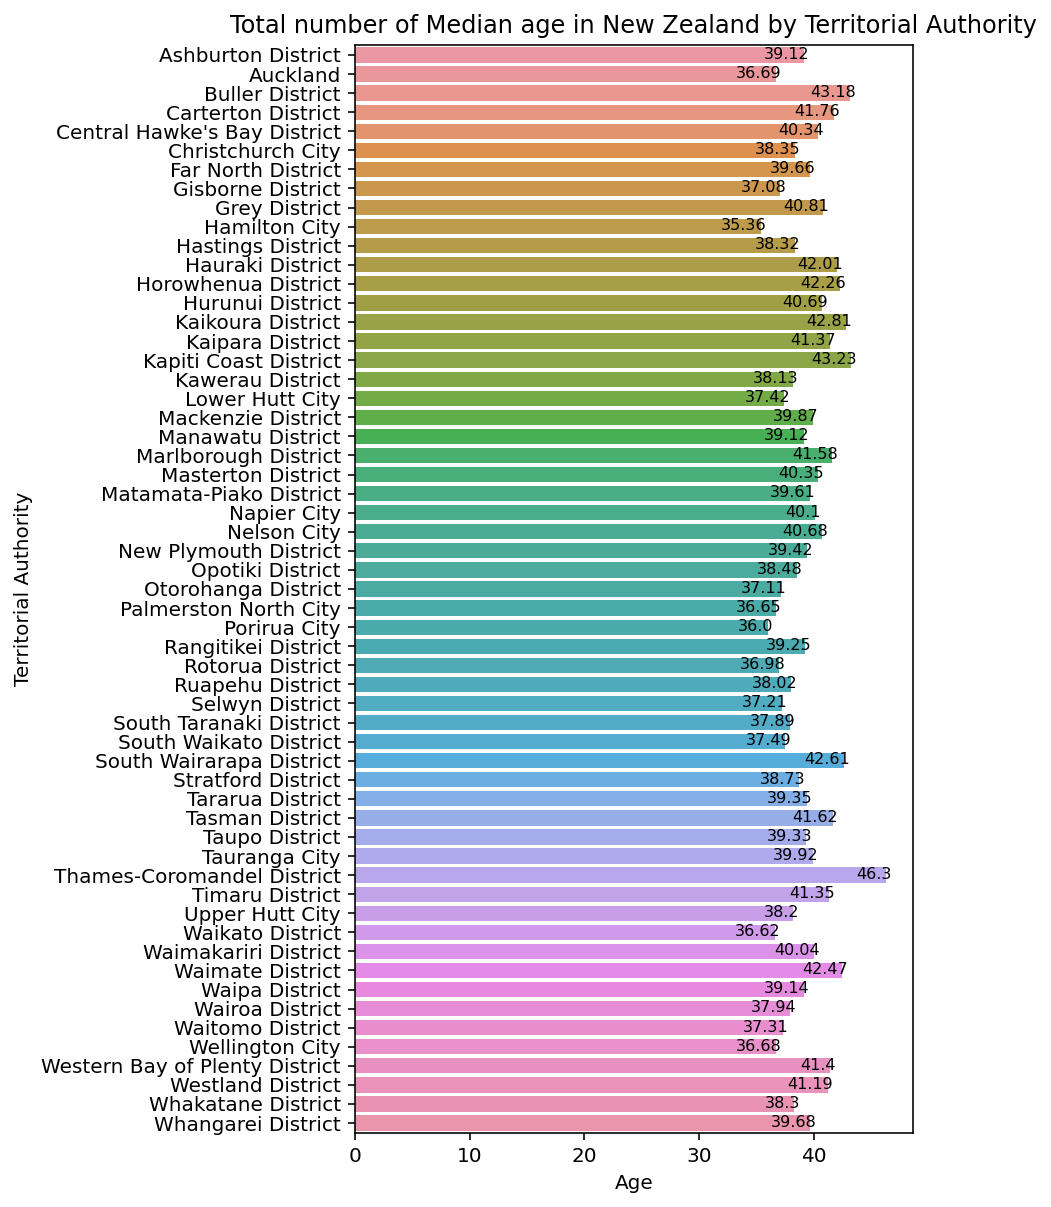

In [165]:
ax=plt.figure(figsize=(5,10))
ax = sns.barplot(df_trainEco_loaded_drop["age"],                
                 y=df_trainEco_loaded_drop["TA2018"],estimator=sum)
ax.set_title('Total number of Median age in New Zealand by Territorial Authority')
ax.set(xlabel='Age', ylabel='Territorial Authority')
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.6,
             str(round((i.get_width()), 2)),
             fontsize = 8, 
             color ='black',ha="right")

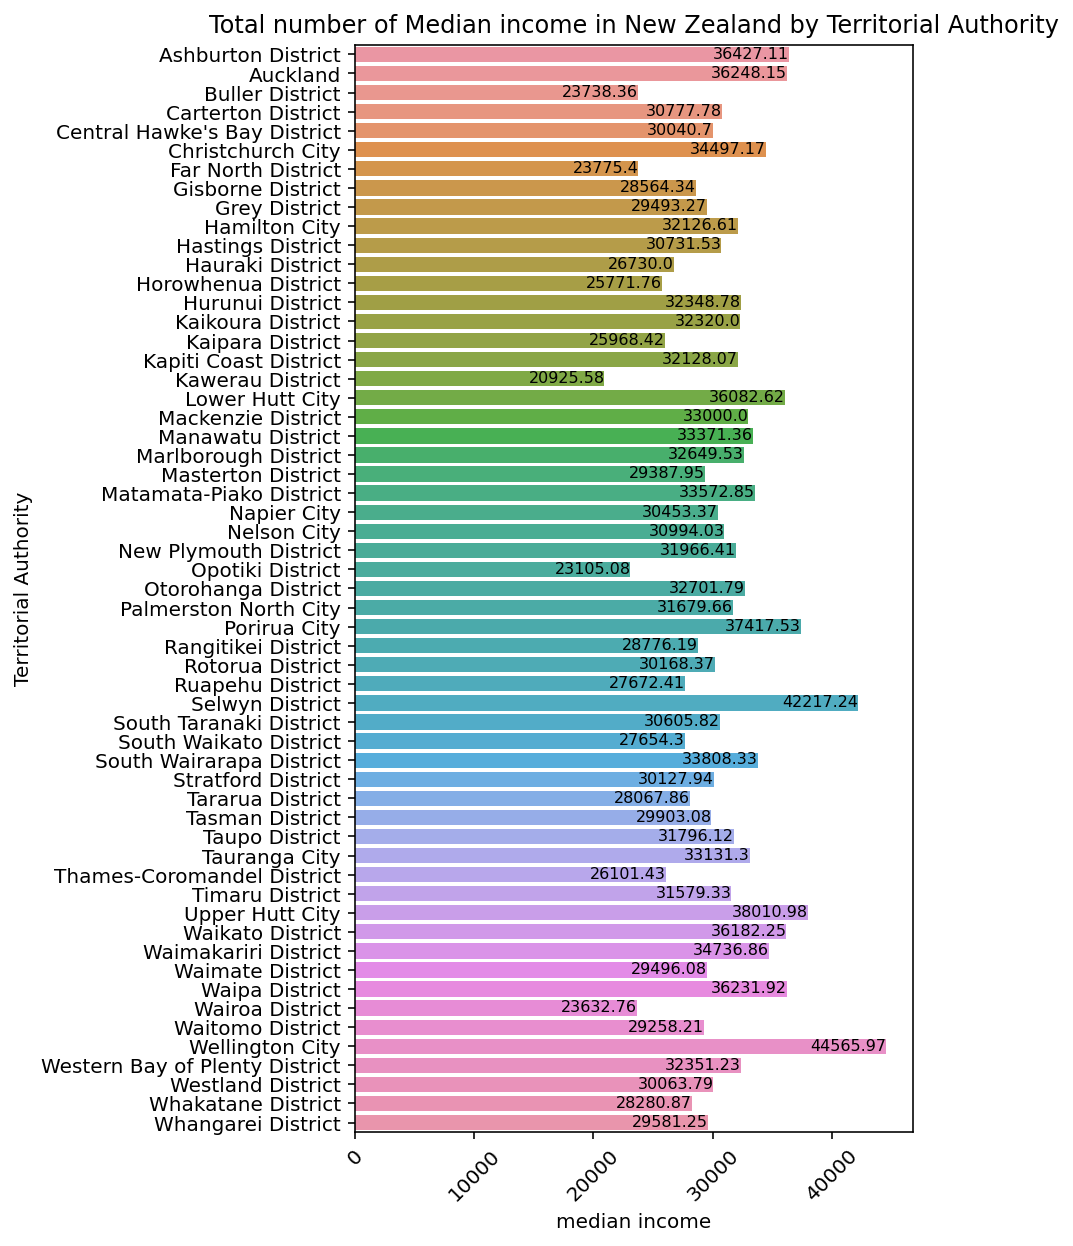

In [166]:
ax=plt.figure(figsize=(5,10))
ax = sns.barplot(df_trainEco_loaded_drop["median_income"],                
                 y=df_trainEco_loaded_drop["TA2018"],estimator=sum)
ax.set_title('Total number of Median income in New Zealand by Territorial Authority')
ax.set(xlabel='median income', ylabel='Territorial Authority')
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.6,
             str(round((i.get_width()), 2)),
             fontsize = 8, 
             color ='black',ha="right")
    plt.xticks(rotation=45)

In [167]:
# df_train_Crime_MY3=pd.read_csv(r"data\NewTable08_Map_Crime_MY30713.csv")
df_train_Crime_MY3

Meshblock   LATITUDE   LONGITUDE               TA2018 Month_Year  \
0         9951709 -37.724167  175.247912        Hamilton City     17-Oct   
1         2252600 -40.891546  175.660886   Masterton District     17-Oct   
2         1711500 -39.943134  174.993819                  NaN     17-Oct   
3         0097800 -35.687859  174.185711   Whangarei District     17-Oct   
4         178-178 -36.850883  174.764488             Auckland     17-Nov   
...           ...        ...         ...                  ...        ...   
1071493   3352903 -35.229406  173.947203   Far North District     19-Aug   
1071494   7751507 -35.303548  173.642652   Far North District     19-Aug   
1071495   1887501 -37.800729  175.319178        Hamilton City     19-Aug   
1071496   1882200 -40.717712  175.214522  Horowhenua District     19-Aug   
1071497   2440600 -43.193666  172.741091     Hurunui District     19-Aug   

         Month  Year  Area_unitID             Area_Unit  SHAPE_X  ...  \
0           10     1          572             Sylvester      NaN  ...   
1           10     1         1148       Opaki-Fernridge      NaN  ...   
2           10     1          354     Castlecliff North      NaN  ...   
3           10     1         1594              Vinetown      NaN  ...   
4           11     1          633                999999      NaN  ...   
...        ...   ...          ...                   ...      ...  ...   
1071493      8     3          111              Kerikeri      NaN  ...   
1071494      8     3          292  Waihou Valley-Hupara      NaN  ...   
1071495      8     3         1711        Hillcrest West      NaN  ...   
1071496      8     3         1757      Mangaore-Manakau      NaN  ...   
1071497      8     3         1430            Leithfield      NaN  ...   

         2_5001to10000  3_10001to20000 4_20001to30000  5_30001to50000  \
0               6564.0         22275.0        16623.0         26343.0   
1                783.0          4290.0         3684.0          4659.0   
2                  NaN             NaN            NaN             NaN   
3               3297.0         15009.0        11709.0         14529.0   
4              61605.0        182202.0       140733.0        243738.0   
...                ...             ...            ...             ...   
1071493         2886.0         13167.0         8946.0          9567.0   
1071494         2886.0         13167.0         8946.0          9567.0   
1071495         6564.0         22275.0        16623.0         26343.0   
1071496         1140.0          7032.0         5295.0          5484.0   
1071497          402.0          1920.0         1572.0          2235.0   

         6_50001to70000 7_70001_or_more               1_Under15years  \
0               18036.0         19011.0      34347,40254,67191,19026   
1                2601.0          2406.0         4977,4374,10839,5358   
2                   NaN             NaN          NULL,NULL,NULL,NULL   
3                9378.0          9723.0      19176,15129,39393,17346   
4              185622.0        248622.0  313785,357603,711036,189234   
...                 ...             ...                          ...   
1071493          5457.0          4530.0                        14100   
1071494          5457.0          4530.0                        14100   
1071495         18036.0         19011.0                        34347   
1071496          3114.0          2361.0                         6060   
1071497          1572.0          1449.0                         2433   

             2_15to29years 3_30to64years  4_65years_and_over  
0                      NaN           NaN                 NaN  
1                      NaN           NaN                 NaN  
2                      NaN           NaN                 NaN  
3                      NaN           NaN                 NaN  
4                      NaN           NaN                 NaN  
...                    ...           ...                 ...  
1071493  10344,28176,12588         

In [168]:
df_train_Crime_MY3.columns

Index(['Meshblock', 'LATITUDE', 'LONGITUDE', 'TA2018', 'Month_Year', 'Month',
       'Year', 'Area_unitID', 'Area_Unit', 'SHAPE_X', 'SHAPE_Y',
       'Location_type_ID', 'Location_Type', 'Number_of_Records',
       'Day_Of_Week_ID', 'Day_Of_Week', 'HRGroup', 'Hour_Of_Day', 'Table1',
       'TA_ID', 'Territorial_Authority', 'Weapon_ID', 'Weapon', 'WKT',
       'ANZSOC_GroupID', 'ANZSOC_Group', 'Locn_Type_DivisionID',
       'Locn_Type_Division', 'ANZSOC_Subdivision_ID', 'ANZSOC_Subdivision',
       'Victimisations', 'Types_of_Crime_ID', 'Types_of_Crime',
       'population_count', 'Population_percentage', 'Crime_Case_in_area',
       'Crime_Cases_in_area_percentage', 'crime_by_area_and_population',
       'weekly_rent', 'weekly_rent_percent', 'sex_Male', 'sex_Male_Percent',
       'sex_Female', 'sex_Female_Precent', 'Median_age', 'Household',
       'Employed_Full_time', 'Employed_Part_time', 'Unemployed',
       '1_5000orless', '2_5001to10000', '3_10001to20000', '4_20001to30000',
     

In [169]:
cols=['Meshblock', 'LATITUDE', 'LONGITUDE', 'TA2018', 'Month',
       'Year', 'Area_unitID', 'SHAPE_X', 'SHAPE_Y',
       'Location_type_ID', 
       'Day_Of_Week_ID',  'HRGroup', 
       'TA_ID',  'Weapon_ID',
       'ANZSOC_GroupID', 'Locn_Type_DivisionID',
       'ANZSOC_Subdivision_ID', 
       'Victimisations', 'Types_of_Crime_ID', 'Types_of_Crime', 'Number_of_Records']

In [170]:
cols2=['Meshblock', 'LATITUDE', 'LONGITUDE', 'TA2018', 'Month',
       'Year', 'Area_unitID', 'SHAPE_X', 'SHAPE_Y',
       'Location_type_ID', 
       'Day_Of_Week_ID',  'HRGroup', 
       'TA_ID',  'Weapon_ID',
       'ANZSOC_GroupID', 'Locn_Type_DivisionID',
       'ANZSOC_Subdivision_ID', 
       'Victimisations', 'Types_of_Crime_ID', 'Types_of_Crime', 'Number_of_Records','population_count', 'Population_percentage', 'Crime_Case_in_area',
       'Crime_Cases_in_area_percentage', 'crime_by_area_and_population',
       'weekly_rent', 'weekly_rent_percent', 'sex_Male', 'sex_Male_Percent',
       'sex_Female', 'sex_Female_Precent', 'Median_age', 'Household',
       'Employed_Full_time', 'Employed_Part_time', 'Unemployed',
       '1_5000orless', '2_5001to10000', '3_10001to20000', '4_20001to30000',
       '5_30001to50000', '6_50001to70000', '7_70001_or_more', '1_Under15years',
       '2_15to29years', '3_30to64years', '4_65years_and_over']

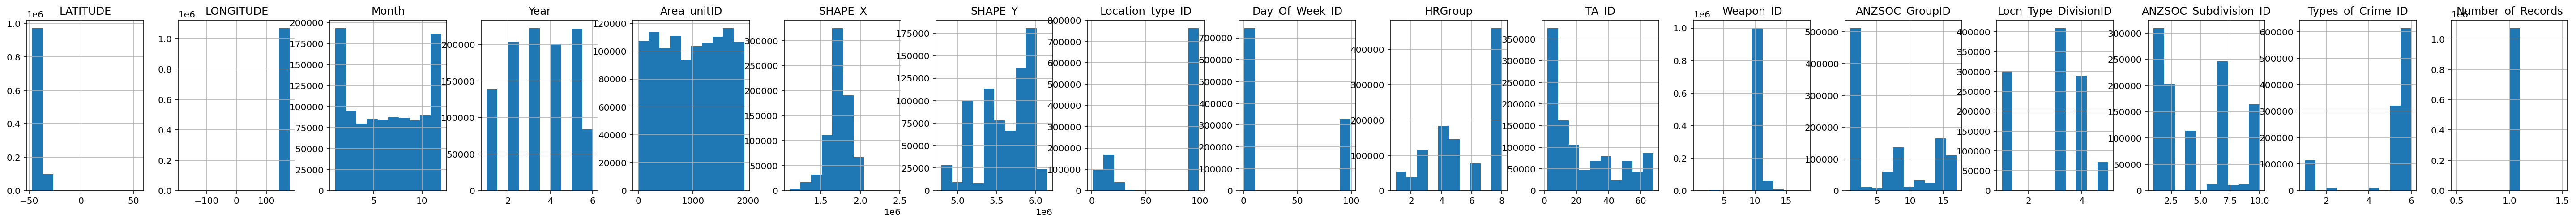

In [171]:
df_train_Crime_MY3[cols].hist(layout=(1,len(cols)), figsize=(3*len(cols),3.5));

In [172]:
df_train_Crime_MY3[cols].corr()

LATITUDE  LONGITUDE     Month      Year  Area_unitID  \
LATITUDE               1.000000  -0.741060 -0.005697  0.010885     0.001593   
LONGITUDE             -0.741060   1.000000  0.003460 -0.007999     0.013219   
Month                 -0.005697   0.003460  1.000000 -0.275648    -0.001102   
Year                   0.010885  -0.007999 -0.275648  1.000000    -0.001834   
Area_unitID            0.001593   0.013219 -0.001102 -0.001834     1.000000   
SHAPE_X                0.690384   0.751264 -0.000525  0.004341     0.008351   
SHAPE_Y                0.999965   0.523618 -0.003939  0.004891     0.048455   
Location_type_ID       0.014425  -0.007040 -0.007247  0.046077     0.001702   
Day_Of_Week_ID        -0.022818  -0.003042  0.006042 -0.026094    -0.007577   
HRGroup               -0.014218  -0.001500  0.006625 -0.041089    -0.008705   
TA_ID                 -0.085462  -0.000027  0.002143 -0.001873     0.025510   
Weapon_ID             -0.000706  -0.001387 -0.003229  0.015095    -0.001014   
ANZSOC_GroupID         0.008144  -0.006727 -0.005422  0.041740    -0.007015   
Locn_Type_DivisionID  -0.002257   0.003215  0.004488 -0.040641     0.005699   
ANZSOC_Subdivision_ID  0.015389  -0.008561 -0.007540  0.052160    -0.004455   
Types_of_Crime_ID      0.013821   0.011587 -0.011675  0.004695     0.011333   
Number_of_Records           NaN        NaN       NaN       NaN          NaN   

                        SHAPE_X   SHAPE_Y  Location_type_ID  Day_Of_Week_ID  \
LATITUDE               0.690384  0.999965          0.014425       -0.022818   
LONGITUDE              0.751264  0.523618         -0.007040       -0.003042   
Month                 -0.000525 -0.003939         -0.007247        0.006042   
Year                   0.004341  0.004891          0.046077       -0.026094   
Area_unitID            0.008351  0.048455          0.001702       -0.007577   
SHAPE_X                1.000000  0.687692          0.017249       -0.045092   
SHAPE_Y                0.687692  1.000000          0.017641       -0.048160   
Location_type_ID       0.017249  0.017641          1.000000       -0.321092   
Day_Of_Week_ID        -0.045092 -0.048160         -0.321092        1.000000   
HRGroup               -0.035543 -0.032773         -0.283111        0.678739   
TA_ID                  0.192099 -0.082979         -0.019066        0.017208   
Weapon_ID              0.001601 -0.001681         -0.019707        0.034795   
ANZSOC_GroupID         0.019230  0.005835          0.536429       -0.132621   
Locn_Type_DivisionID   0.015961  0.000310         -0.419765        0.031010   
ANZSOC_Subdivision_ID  0.026617  0.017095          0.660577       -0.184172   
Types_of_Crime_ID      0.021001  0.038769          0.042022        0.107817   
Number_of_Records           NaN       NaN               NaN             NaN   

                        HRGroup     TA_ID  Weapon_ID  ANZSOC_GroupID  \
LATITUDE              -0.014218 -0.085462  -0.000706        0.008144   
LONGITUDE             -0.001500 -0.000027  -0.001387       -0.006727   
Month                  0.006625  0.002143  -0.003229       -0.005422   
Year                  -0.041089 -0.001873   0.015095        0.041740   
Area_unitID           -0.008705  0.025510  -0.001014       -0.007015   
SHAPE_X               -0.035543  0.192099   0.001601        0.019230   
SHAPE_Y               -0.032773 -0.082979  -0.001681        0.005835   
Location_type_ID      -0.283111 -0.019066  -0.019707        0.536429   
Day_Of_Week_ID         0.678739  0.017208   0.034795       -0.132621   
HRGroup                1.000000 -0.008770   0.045101       -0.091240   
TA_ID                 -0.008770  1.000000  -0.001582       -0.033434   
Weapon_ID              0.045101 -0.001582   1.000000       -0.032449   
ANZSOC_GroupID        -0.091240 -0.033434  -0.032449        1.000000   
Locn_Type_DivisionID   0.047802  0.028141   0.096403       -0.273343   
ANZSOC_Subdivision_ID -0.140157 -0.034232   0.037797        0.862310   
Types_of_Crime_ID      0.

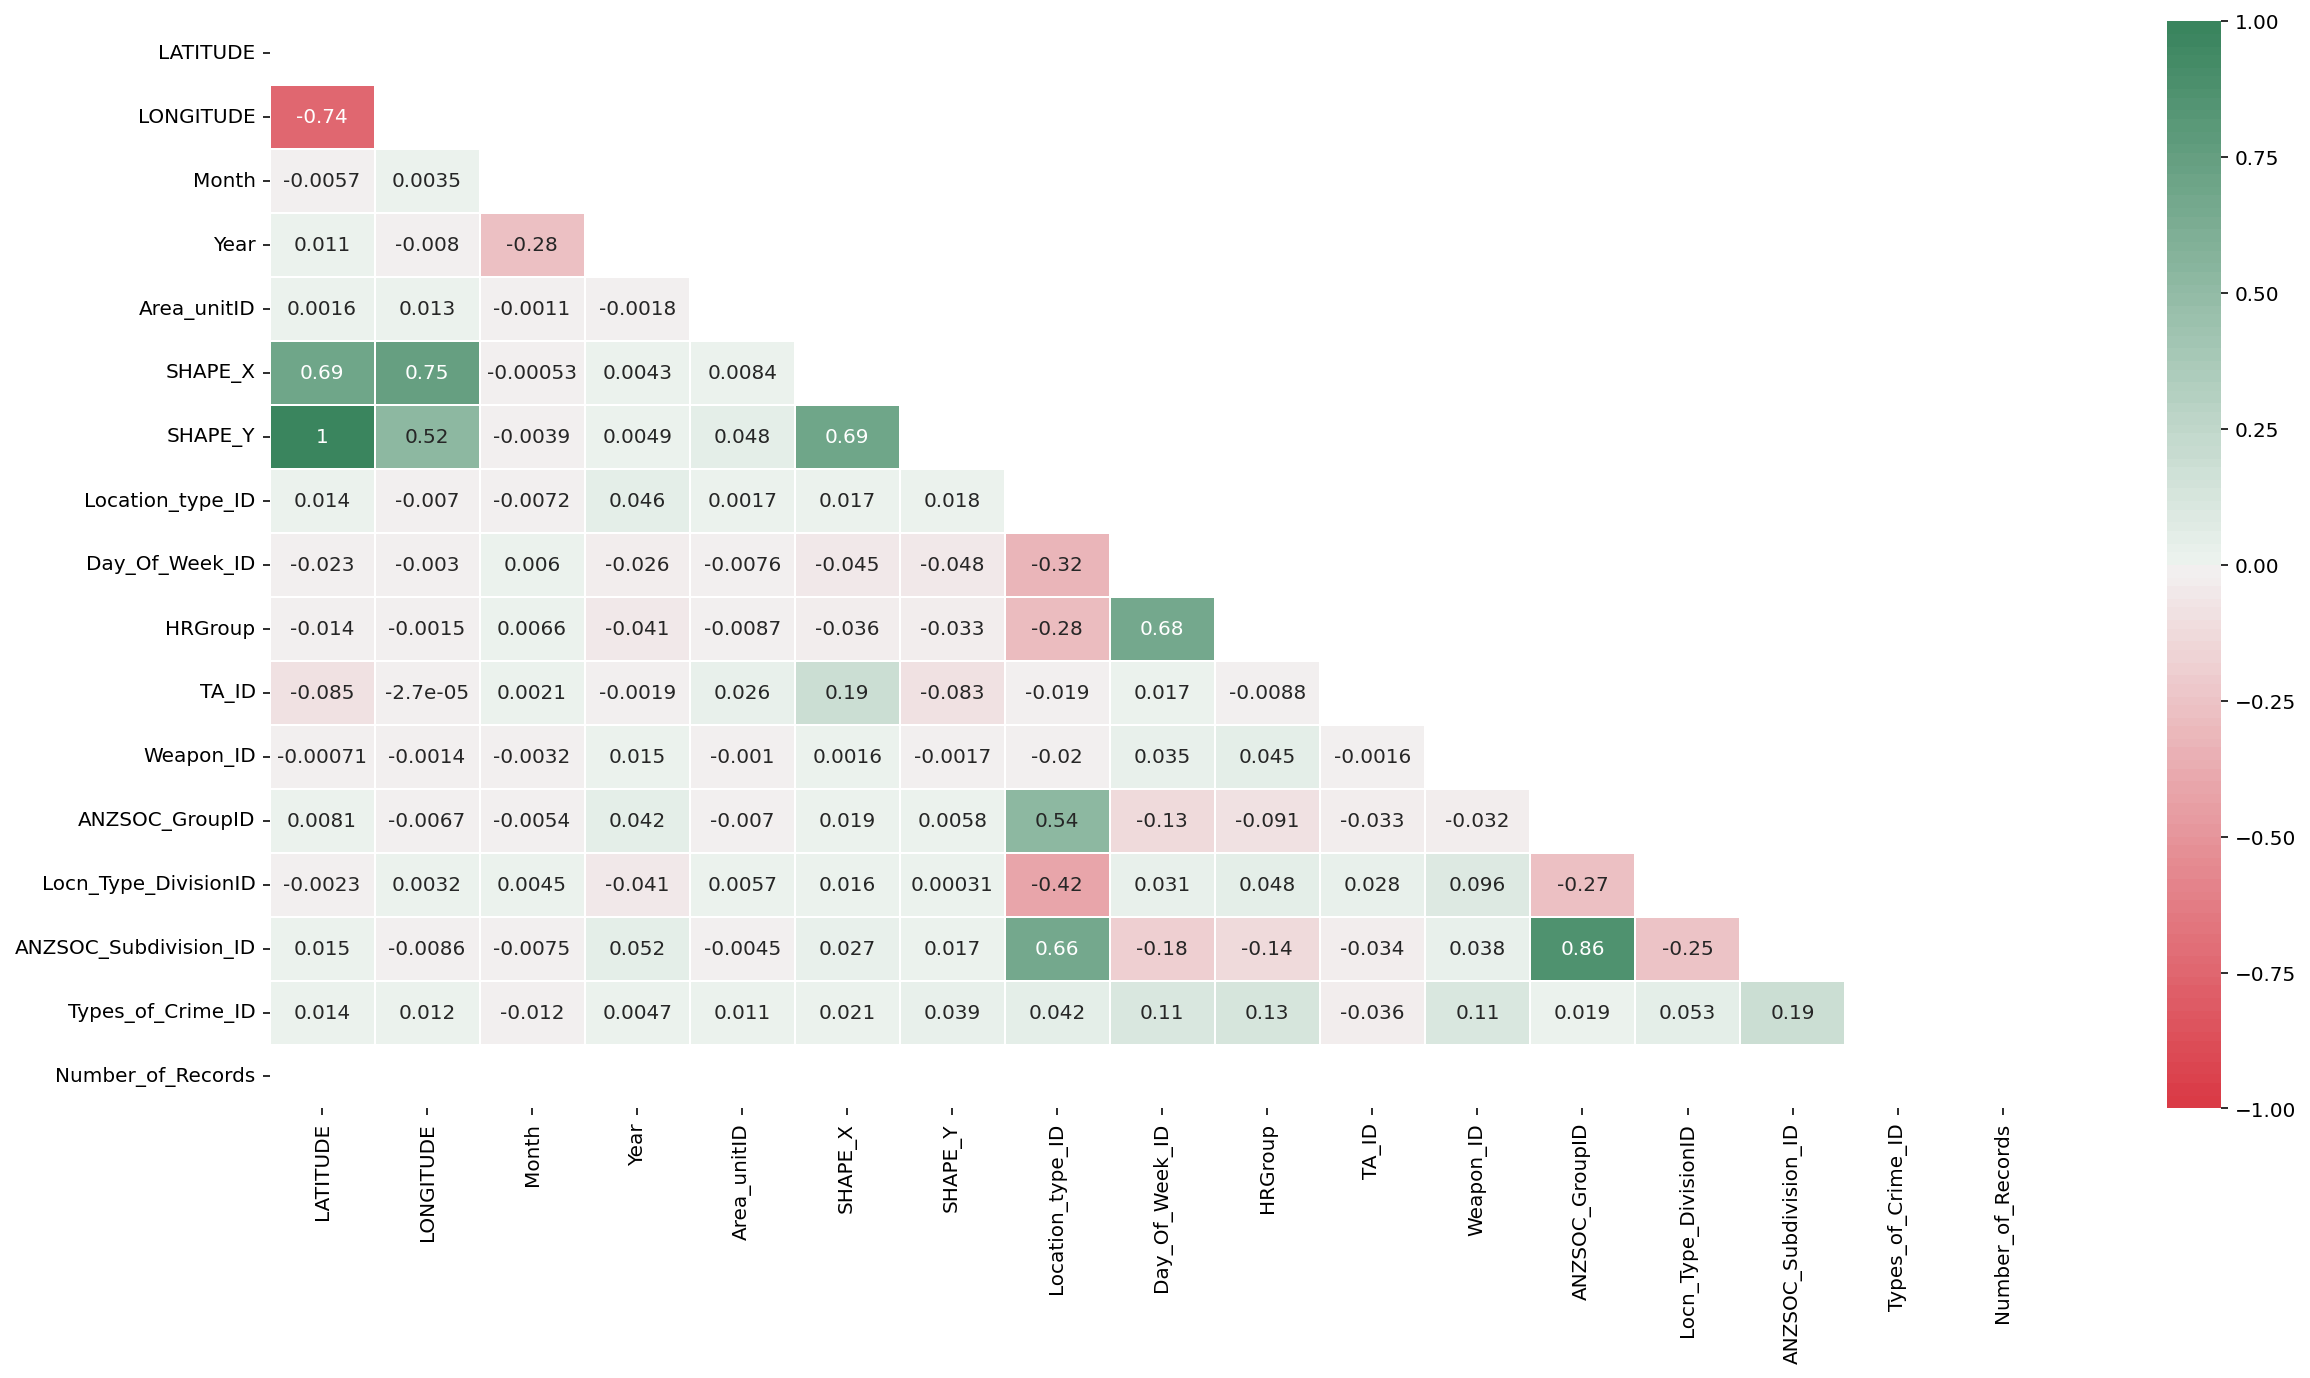

In [173]:
dcorr=df_train_Crime_MY3[cols].corr()
mask= np.zeros_like(dcorr)
mask[np.triu_indices_from(mask)]= True
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(dcorr,cmap=sns.diverging_palette(10,145, n = 100),
           vmin=-1, vmax=1,center=0, linewidths=1, annot= True, mask=mask, ax=ax);

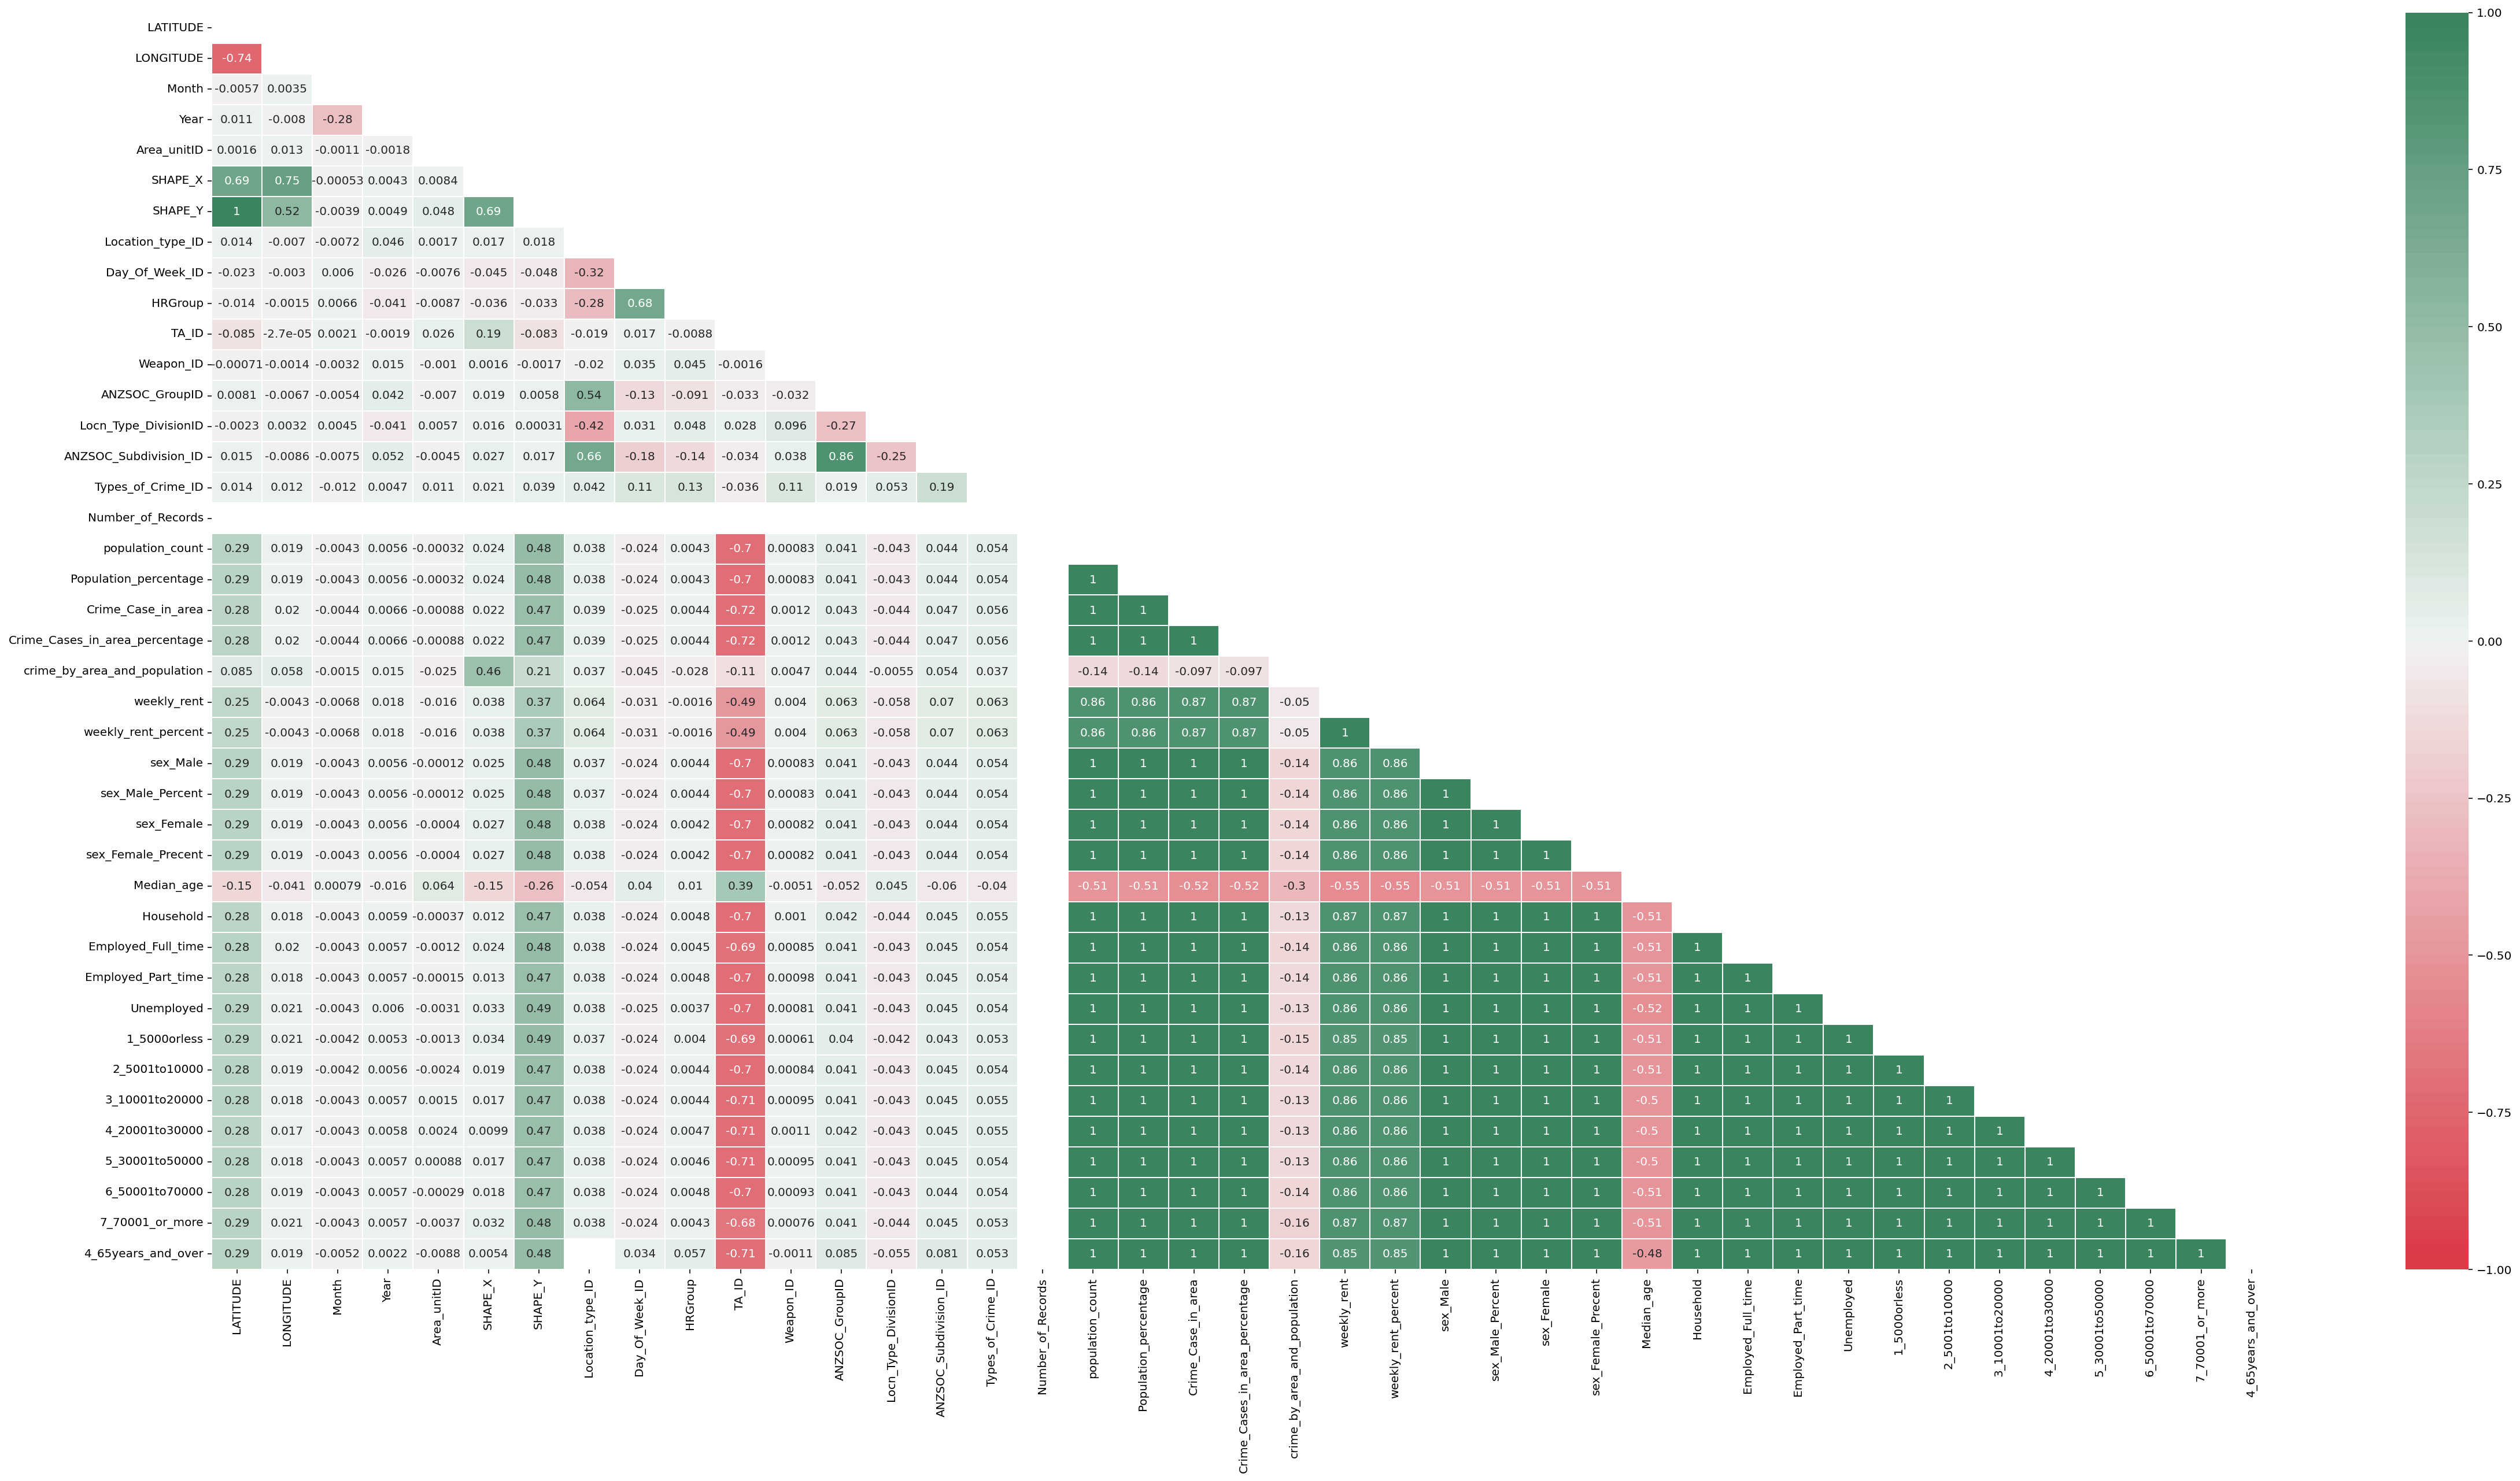

In [174]:
dcorr=df_train_Crime_MY3[cols2].corr()
mask= np.zeros_like(dcorr)
mask[np.triu_indices_from(mask)]= True
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(dcorr,cmap=sns.diverging_palette(10,145, n = 100),
           vmin=-1, vmax=1,center=0, linewidths=1, annot= True, mask=mask, ax=ax);